### Todos:
### 1. preprocess the data to make it suitable for glove embeding:
### a. remove ' from words( don't -> dont)
### b. convert all letters to lowercase ( Hoping -> hoping)
### 2. find the frequency of each emoji to see if the dataset is balanced and balance the dataset(important)

In [1]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt
import interesting_labels

In [2]:
import pandas

In [3]:
def get_data():
    header = ['status_id','tweet','label']
    data_set = pandas.read_csv('processed.txt',delimiter='\t',names = header)
    return data_set

def get_data_set():
    return global_data_set

def get_glove_embedding(glove): 
    return nn.Embedding.from_pretrained(glove.vectors)

def get_label_mapping():
    original_list = interesting_labels.wanted_list
    output_list = [i for i in range(len(original_list))]
    return dict(zip(original_list,output_list))
  
def cleanup_tweet(tweet):
    if(type(tweet) == str):
        tweet = tweet.lower()
        tweet = tweet.replace('\'','')
    return tweet
    

In [4]:
mapping = get_label_mapping()

In [5]:
global_data_set = get_data()

In [6]:
glove = torchtext.vocab.GloVe(name="twitter.27B",dim=50)

In [7]:
glove_emb = get_glove_embedding(glove)

In [8]:
data_set = get_data_set()

In [9]:
len(data_set)

46386

In [10]:
type(data_set['tweet'][0])

str

In [11]:
data_set

,status_id,tweet,label
0,742407819496919041,Hoping I don't screw up this interview,1381
1,744101567981359105,I feel like a baby kangaroo stuck in it's moth...,1421
2,746426733834944512,girl ppl should be happy i even remembered her...,1381
3,743951261607690240,"Oh, the irony if Misha wins the Choice TV Scen...",1387
4,747298371967193088,"I miss you to , you so fake now",1397
5,743505228759187457,ever since I laid my eyes on Mikayla I knew sh...,1445
6,744146216263499776,i know,1420
7,744526330964762624,Bacolod please?!,1403
8,744327078019891201,ugh six months is a long time.,1447
9,747879438981947393,Things can change so quickly,1424


In [12]:
data_set['label']=data_set['label'].map(mapping)

In [13]:
data_set

,status_id,tweet,label
0,742407819496919041,Hoping I don't screw up this interview,4
1,744101567981359105,I feel like a baby kangaroo stuck in it's moth...,44
2,746426733834944512,girl ppl should be happy i even remembered her...,4
3,743951261607690240,"Oh, the irony if Misha wins the Choice TV Scen...",10
4,747298371967193088,"I miss you to , you so fake now",20
5,743505228759187457,ever since I laid my eyes on Mikayla I knew sh...,68
6,744146216263499776,i know,43
7,744526330964762624,Bacolod please?!,26
8,744327078019891201,ugh six months is a long time.,70
9,747879438981947393,Things can change so quickly,47


In [14]:
data_set['tweet'] = data_set['tweet'].apply(cleanup_tweet)

In [15]:
data_set

,status_id,tweet,label
0,742407819496919041,hoping i dont screw up this interview,4
1,744101567981359105,i feel like a baby kangaroo stuck in its mothe...,44
2,746426733834944512,girl ppl should be happy i even remembered her...,4
3,743951261607690240,"oh, the irony if misha wins the choice tv scen...",10
4,747298371967193088,"i miss you to , you so fake now",20
5,743505228759187457,ever since i laid my eyes on mikayla i knew sh...,68
6,744146216263499776,i know,43
7,744526330964762624,bacolod please?!,26
8,744327078019891201,ugh six months is a long time.,70
9,747879438981947393,things can change so quickly,47


In [16]:
def split_tweet(tweet):
    tweet = tweet.replace(".", " . ") \
                 .replace(",", " , ") \
                 .replace(";", " ; ") \
                 .replace("?", " ? ")
    return tweet.split()

In [17]:
def get_tweet_words(glove_vector):
    train, valid, test = [],[],[]
    data_set = get_data_set()
    for i in range(len(data_set)):
        tweet = data_set['tweet'][i]
        if(type(tweet) != str):
            continue
        idxs = [glove_vector.stoi[w]        # lookup the index of word
                for w in split_tweet(tweet)
                if w in glove_vector.stoi] # keep words that has an embedding
        if not idxs: # ignore tweets without any word with an embedding
            continue
        idxs = torch.tensor(idxs) # convert list to pytorch tensor
        label = torch.tensor(data_set['label'][i]).long()
        if i % 5 < 3:
            train.append((idxs, label))
        elif i % 5 == 4:
            valid.append((idxs, label))
        else:
            test.append((idxs, label))
    return train, valid, test

In [18]:
train, valid, test = get_tweet_words(glove)

In [19]:
train[0]

(tensor([3653,   10,  348, 6456,   85,   53, 2706]), tensor(4))

In [20]:
valid[0]

(tensor([  10,  292,   15,   16,    4,   15,   55, 1271,  110]), tensor(20))

In [21]:
len(train)

27705

In [22]:
tweet_emb = glove_emb(train[0][0])
tweet_emb.shape

torch.Size([7, 50])

### Recurrent Neural Network Module

In [23]:
rnn_layer = nn.RNN(input_size=50,    # dimension of the input repr
                   hidden_size=50,   # dimension of the hidden units
                   batch_first=True) # input format is [batch_size, seq_len, repr_dim]

In [24]:
tweet_input = tweet_emb.unsqueeze(0) # add the batch_size dimension
h0 = torch.zeros(1, 1, 50)     # initial hidden layer
out, last_hidden = rnn_layer(tweet_input, h0)

In [25]:
print(out.shape)
print(last_hidden.shape)

torch.Size([1, 7, 50])
torch.Size([1, 1, 50])


In [26]:
out[:,-1,:]

tensor([[-0.5894, -0.4485,  0.1045,  0.6893,  0.4893, -0.4151,  0.6054,  0.0753,
         -0.6361,  0.8046, -0.6897,  0.2980,  0.6253,  0.4754,  0.1993,  0.2872,
          0.0525,  0.8086, -0.7206,  0.0111,  0.5468,  0.5528, -0.2195,  0.4985,
         -0.7703, -0.4982,  0.4968, -0.4082,  0.2769,  0.2026, -0.2671,  0.3973,
         -0.1464,  0.8022,  0.5468, -0.1759, -0.0672,  0.3590, -0.7886,  0.1918,
         -0.3490, -0.6286, -0.3340, -0.2255, -0.5653, -0.5163, -0.8254, -0.4077,
         -0.1671,  0.4199]], grad_fn=<SliceBackward>)

### Building the model

In [27]:
class TweetRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetRNN, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

model = TweetRNN(input_size=50, hidden_size=50, num_classes=len(interesting_labels.wanted_list))

In [28]:
data_set.nunique()

status_id    43280
tweet        42017
label           78
dtype: int64

In [29]:
train[0:16097][1]

(tensor([   10,   264,    63,    11,   347, 46998,  2457,    35,   221,  9193,
         50306]), tensor(44))

In [30]:
len(set([element[1].item() for element in train]))

78

In [31]:
import random

class TweetBatcher:
    def __init__(self, tweets, batch_size=32, drop_last=False):
        # store tweets by length
        self.tweets_by_length = {}
        for words, label in tweets:
            # compute the length of the tweet
            wlen = words.shape[0]
            # put the tweet in the correct key inside self.tweet_by_length
            if wlen not in self.tweets_by_length:
                self.tweets_by_length[wlen] = []
            self.tweets_by_length[wlen].append((words, label),)
         
        #  create a DataLoader for each set of tweets of the same length
        self.loaders = {wlen : torch.utils.data.DataLoader(
                                    tweets,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    drop_last=drop_last) # omit last batch if smaller than batch_size
            for wlen, tweets in self.tweets_by_length.items()}
        
    def __iter__(self): # called by Python to create an iterator
        # make an iterator for every tweet length
        iters = [iter(loader) for loader in self.loaders.values()]
        while iters:
            # pick an iterator (a length)
            im = random.choice(iters)
            try:
                yield next(im)
            except StopIteration:
                # no more elements in the iterator, remove it
                iters.remove(im)

In [32]:
for i, (tweets, labels) in enumerate(TweetBatcher(train, drop_last=True)):
    print(tweets.shape, labels.shape)
print(i)

torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 14]) torch.Size([32])
torch.Size([32, 29]) torch.Size([32])
torch.Size([32, 9]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 22]) torch.Size([32])
torch.Size([32, 3]) torch.Size([32])
torch.Size([32, 18]) torch.Size([32])
torch.Size([32, 29]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 25]) torch.Size([32])
torch.Size([32, 16]) torch.Size([32])
torch.Size([32, 25]) torch.Size([32])
torch.Size([32, 30]) torch.Size([32])
torch.Size([32, 17]) torch.Size([32])
torch.Size([32, 24]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 24]) torch.Size([32])
torch.Size([32, 16]) torch.Size([32])
torch.Size([32, 12]) torch.Size([32])
torch.Size([32, 14]) torch.Size([32])
torch.Size([32, 26]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 3]) 

torch.Size([32, 3]) torch.Size([32])
torch.Size([32, 4]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 3]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 11]) torch.Size([32])
torch.Size([32, 11]) torch.Size([32])
torch.Size([32, 9]) torch.Size([32])
torch.Size([32, 3]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 12]) torch.Size([32])
torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 9]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 10]) torch.Size

In [33]:
def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for tweets, labels in data_loader:
        output = model(tweets)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return float(correct) / float(total)

test_loader = TweetBatcher(test, batch_size=32, drop_last=False)
get_accuracy(model, test_loader)


0.011927998265018435

In [34]:
def train_rnn_network(model, train, valid, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for tweets, labels in train:
            optimizer.zero_grad()
            pred = model(tweets)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

Epoch 1; Loss 3.607853; Train Acc 0.144880; Val Acc 0.142997
Epoch 2; Loss 3.841527; Train Acc 0.147666; Val Acc 0.144297
Epoch 3; Loss 3.461706; Train Acc 0.150226; Val Acc 0.149068
Epoch 4; Loss 3.329280; Train Acc 0.157455; Val Acc 0.155898
Epoch 5; Loss 3.507942; Train Acc 0.158509; Val Acc 0.156440
Epoch 6; Loss 3.542214; Train Acc 0.160617; Val Acc 0.157090
Epoch 7; Loss 3.530754; Train Acc 0.161521; Val Acc 0.159367
Epoch 8; Loss 3.447022; Train Acc 0.161521; Val Acc 0.157632
Epoch 9; Loss 3.408499; Train Acc 0.161898; Val Acc 0.159258
Epoch 10; Loss 3.195835; Train Acc 0.162387; Val Acc 0.160451
Epoch 11; Loss 3.426037; Train Acc 0.163742; Val Acc 0.161427
Epoch 12; Loss 3.155307; Train Acc 0.164458; Val Acc 0.160234
Epoch 13; Loss 3.488430; Train Acc 0.165512; Val Acc 0.163703
Epoch 14; Loss 3.499921; Train Acc 0.166378; Val Acc 0.163270
Epoch 15; Loss 3.501239; Train Acc 0.166867; Val Acc 0.163920
Epoch 16; Loss 3.532398; Train Acc 0.169578; Val Acc 0.166414
Epoch 17; Loss 3.

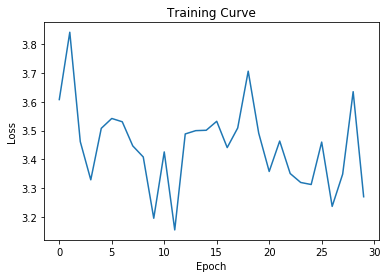

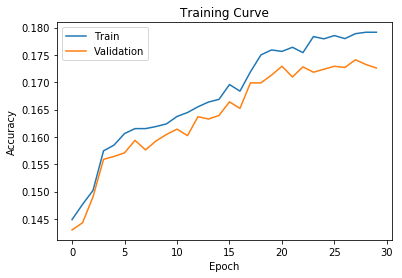

0.1697028844068532

In [35]:
model = TweetRNN(input_size=50, hidden_size=50, num_classes=len(interesting_labels.wanted_list))
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=30, learning_rate=2e-4)
get_accuracy(model, test_loader)

### LSTM Model

In [37]:
class TweetLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetLSTM, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state and cell state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the LSTM
        out, _ = self.rnn(x, (h0, c0))
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

Epoch 1; Loss 3.421313; Train Acc 0.179669; Val Acc 0.172376
Epoch 2; Loss 3.400843; Train Acc 0.181137; Val Acc 0.175087
Epoch 3; Loss 3.607886; Train Acc 0.181852; Val Acc 0.173677
Epoch 4; Loss 3.621941; Train Acc 0.182455; Val Acc 0.173894
Epoch 5; Loss 3.120440; Train Acc 0.182794; Val Acc 0.173135
Epoch 6; Loss 3.166311; Train Acc 0.182191; Val Acc 0.174545
Epoch 7; Loss 3.526715; Train Acc 0.181928; Val Acc 0.175304
Epoch 8; Loss 3.472890; Train Acc 0.183170; Val Acc 0.172918
Epoch 9; Loss 3.418666; Train Acc 0.183923; Val Acc 0.174436
Epoch 10; Loss 3.579432; Train Acc 0.183283; Val Acc 0.175520
Epoch 11; Loss 3.223021; Train Acc 0.183622; Val Acc 0.173244
Epoch 12; Loss 3.368072; Train Acc 0.183208; Val Acc 0.178556
Epoch 13; Loss 3.179550; Train Acc 0.183547; Val Acc 0.175520
Epoch 14; Loss 3.168719; Train Acc 0.184224; Val Acc 0.174653
Epoch 15; Loss 3.554513; Train Acc 0.181627; Val Acc 0.176496
Epoch 16; Loss 3.098801; Train Acc 0.182041; Val Acc 0.175087
Epoch 17; Loss 3.

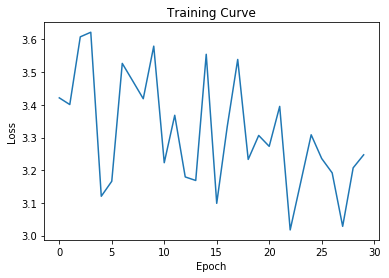

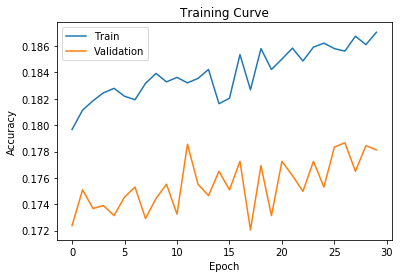

0.17295597484276728

In [38]:
model_lstm = TweetLSTM(input_size=50, hidden_size=50, num_classes=len(interesting_labels.wanted_list))
train_rnn_network(model, train_loader, valid_loader, num_epochs=30, learning_rate=2e-4)
get_accuracy(model, test_loader)